In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Matches=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\matches.csv',sep=str,delimiter=',')
Booking=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\booking.csv',sep=str,delimiter=',')
bets=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\bets.csv',sep=str,delimiter=',')
fh=Booking[Booking.time<='45']  
fh_red=fh[fh.card=='red card'] #Get the red cards occured in the first half

In [5]:
#choose the same bookmakers in Task2. 
betolimp=bets[bets.odd_bookmakers=='Betrally']
#Filter Premier League
Matches=Matches[Matches.league_id==148]
#Get bets data for odd1,oddx and odd2
H=bets[bets['variable']=='odd_1']
Dr=bets[bets['variable']=='odd_x']
A=bets[bets['variable']=='odd_2']

In [12]:
#Merge Home&Away wins,draws, Matches and red cards<45  
df= pd.merge(H,A,on='match_id',how='inner')
df2=pd.merge(df,Dr,on='match_id',how='inner')
df3=pd.merge(df2,Matches,on='match_id',how='inner')
df3=df3.set_index('match_id')
df4=pd.merge(df3,fh_red,on='match_id',how='inner')  
Rmv=df4.match_id 
df3=df3.drop(Rmv,axis=0)
print(df3.head(5))


         odd_bookmakers_x  odd_epoch_x variable_x  value_x odd_bookmakers_y  \
match_id                                                                      
150842              1xBet   1486711421      odd_1     5.10            1xBet   
150844              1xBet   1486711426      odd_1     3.09            1xBet   
158699              1xBet   1488470564      odd_1     1.64            1xBet   
159182              1xBet   1488560163      odd_1     1.82            1xBet   
159175              1xBet   1488560026      odd_1     8.60            1xBet   

          odd_epoch_y variable_y  value_y odd_bookmakers   odd_epoch  ...  \
match_id                                                              ...   
150842     1486711421      odd_2     1.77          1xBet  1486711421  ...   
150844     1486711426      odd_2     2.46          1xBet  1486711426  ...   
158699     1488470564      odd_2     6.05          1xBet  1488470564  ...   
159182     1488560163      odd_2     4.68          1xBet  148

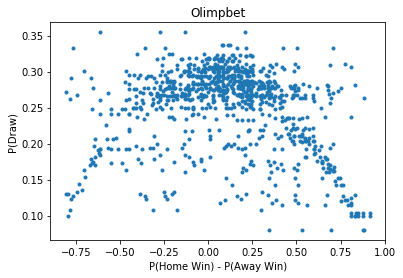

In [27]:
df3['hop']=1/(df3['value_x'])
df3['awp']=1/(df3['value_y'])
df3['drp']=1/(df3['value'])
ph_a=df3['hop']-df3['awp']
p_d=df3['drp']
plt.plot(ph_a,p_d,'.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Betrally')
plt.show()
   


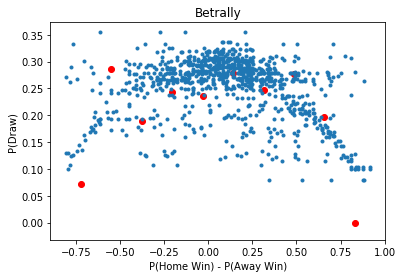

In [34]:
#Merge match scores to get actual results
df3['isdraw']=df3.match_hometeam_score==df3.match_awayteam_score
da=pd.merge(df3,Matches,on='match_id',how='inner') 
y, bins=np.histogram(da['dif'])
x=np.histogram(da[da.isdraw==True]['dif'],bins)[0]
rng=[]
rng.append((bins[:-1] +bins[1:] )/2)
plt.scatter(rng,x/y,color='Red')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Betrally')
df3['hop']=1/(df3['value_x'])
df3['awp']=1/(df3['value_y'])
df3['drp']=1/(df3['value'])
ph_a=df3['hop']-df3['awp']
p_d=df3['drp']
plt.plot(ph_a,p_d,'.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Betrally')
plt.show()


In [ ]:
# few of the red points in the figure has shifted up due to red cards.